### Assessing difference in contrast for scanned images of agar vs GelRite
We wanted to see if there is a quantifiable difference in the quality of the images obtained using agar media vs GelRite. If there is not sufficient contrast in the images, then the worm counting algorithm has a difficult time identifying individual worms in the images.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square, remove_small_objects
import seaborn as sns

## Upload the image files

In [18]:
Agr_path ='/Users/Emily/Desktop/NPScreen_figs/Images/Agr_crop.tif'
GRT_path = '/Users/Emily/Desktop/NPScreen_figs/Images/GRT_crop.tif'

### Creating a function to binarize the image based on the thresholding value.

In [19]:
def bin_im(img):
    image=imread(img)
    thresh = threshold_otsu(image)
    bw = closing(image > thresh, square(3))
    return image, bw


### Creating a function to plot a histogram of pixel intensities for each well

In [20]:
def plot_hist(raw, med):
    fig, axes = plt.subplots(figsize=(3,3))
    axes = sns.histplot(raw.ravel(), kde=False, ax=axes, stat='count', bins=256 )
    axes.set_ylim(0,150000)
    axes.get_yaxis().set_visible(False)
    axes.xaxis.set_tick_params(length=0)
    axes.xaxis.set_ticks_position('bottom')
    axes.set_xticks([0,125,255])

    axes.set_xlabel('Pixel intensity')
    axes.set_anchor('W')
    #plt.rcParams['svg.fonttype'] = 'none'
    sns.despine()
    plt.show()
    #plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/Images/' + media + '_hist_analysis.svg')


### Displaying the binarized images of agar and GelRite media

In [21]:
def plot_binned_im(bw, med):
    fig, axes = plt.subplots()
    plt.imshow(bw, cmap='gray')
    axes.set_anchor('W')
    plt.autoscale(False)
    #plt.rcParams['svg.fonttype'] = 'none'
    plt.axis('off')
    #plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/Images/' + media + '_bw_img.svg')

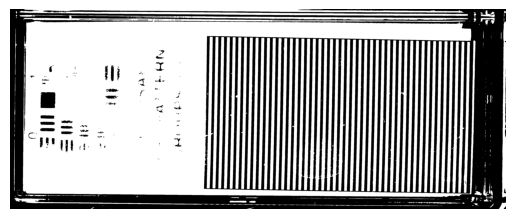

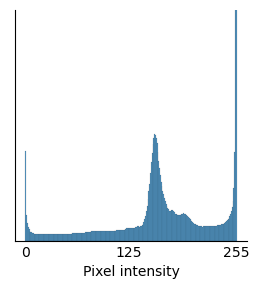

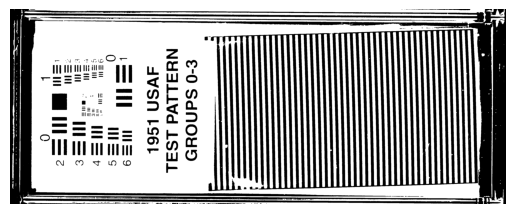

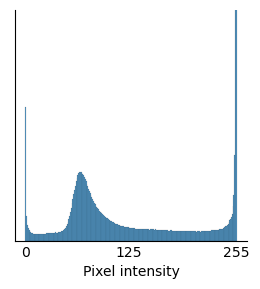

In [22]:
### Looping through and plotting the histograms and binarized images
im_list = [Agr_path, GRT_path]


for im in im_list:
    rw, binned = bin_im(im)
    media = im[-12:-9]
    plot_binned_im(binned, media)
    plot_hist(rw, media)